# Umbrella Sampling Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Primitve simulation of a single Particle in 1D, whose energy depends on its positions.

In [2]:
class mc_1d:
    def __init__(self,x,pot):              #x (float): inital position, pot (np.array): potential in the range (-2,2) in 1e-3 steps
        self.pot    = pot                  #tabulated potential
        self.x      = x                    #x-coordinate
        self.xlist  = []                   #list of x-coordinates
        self.e      = self.read_e(self.x)  #energy
        self.elist  = []                   #list of energys
    
    def read_e(self,x):
        return self.pot[int((x + 2) / 1e-3)]
        
    def mcs(self,tol):
        trialx       = 1e1 
        while -2.0 >= trialx or trialx >= 2.0:
            trialmove = tol*np.random.uniform(-1,1)
            trialx    = self.x + trialmove
        triale       = self.read_e(trialx)
        energydiff   = triale-self.e
        boltzmanterm = min([np.exp(-energydiff),1])
        if boltzmanterm > np.random.random():
            self.e += energydiff
            self.x  = trialx
        self.elist.append(self.e)
        self.xlist.append(self.x)

## Part I

Some possible potentials

In [3]:
def pot1(x, k ,x0):
    return k*(x-x0)**2

def pot2(x,a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x**1+e*x**0


The actually used potential

In [4]:
def potential(x):
    #V = pot1(x,5,0)
    #V = pot2(x,10,0,-25,0,0)
    V = pot2(x,10,5,-40,0,0)
    return V

Tabulate and plot the potential

<function matplotlib.pyplot.show(close=None, block=None)>

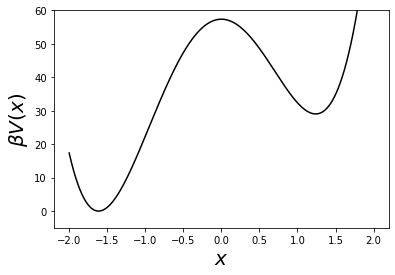

In [5]:
x_in = np.arange(-2,2,1e-3)     #x-coordinate
V_in_pre = potential(x_in)      #potential
V_in = V_in_pre - min(V_in_pre) #potential with minimum at 0

plt.plot(x_in,V_in,c = "black")
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel(r"$\beta V(x)$", fontsize = 20)
plt.ylim(-5,60)
plt.show

Sample the phase space

In [6]:
### These parameters may be changed ###
initial_x = 1.5     #initial x coordinate in the phase space
steps     = 1e6     #number of Monte Carlo steps
tolerance = 1.5    #maximum size of a Monte Carlo step
#######################################


sim = mc_1d(initial_x, V_in)
for _ in range(int(steps)):
    sim.mcs(tolerance)

Plot the position of the particle over the amount of Monte Carlo steps (discards the first 1000 steps)

Text(0, 0.5, '$x$')

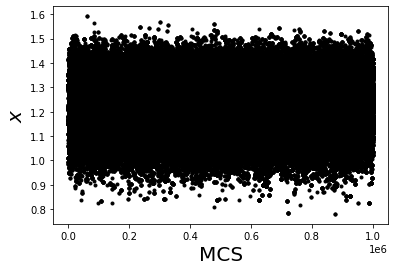

In [7]:
plt.scatter(np.arange(0,steps,1)[1000:],sim.xlist[1000:],c = "black", marker = ".")
plt.xlabel(r"MCS", fontsize = 20)
plt.ylabel(r"$x$", fontsize = 20)

Plot the probability histogram

Text(0, 0.5, '$P(x)$')

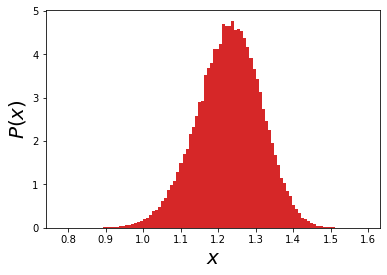

In [8]:
histogram  = plt.hist(sim.xlist[1000:], bins = 100, density = True, color = "tab:red")
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel(r"$P(x)$", fontsize = 20)

Compare the sampled potenital on top of the initial potential

C:\Users\thoefken\AppData\Local\Temp/ipykernel_10620/3912135528.py:3: RuntimeWarning: divide by zero encountered in log
  V_out    = -np.log(p_out)                                   #Free Energy


(-5.0, 60.0)

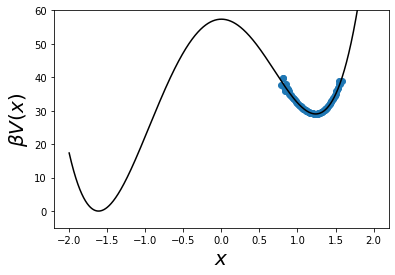

In [9]:
x_out    = histogram[1][:-1]
p_out    = histogram[0]                                     #Probability 
V_out    = -np.log(p_out)                                   #Free Energy
V_offset = potential(x_out[50]) - V_out[50] - min(V_in_pre) #Correcting to the absolute value
V_u      = V_out + V_offset 

plt.plot(x_in,V_in,c = "black")
#plt.scatter(x_out,V_out,c = "tab:blue")
plt.scatter(x_out,V_u,c = "tab:blue")
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel(r"$\beta V(x)$", fontsize = 20)
plt.ylim(-5,60)

## Part II

Define the umbrella potential (harmonic in most cases).

In [10]:
def umbrella(x, k, x0):
    return k*(x-x0)**2

Sample the new phase space

In [11]:
### These parameters may be changed ###
initial_x = -0.5       #initial x coordinate in the phase space
steps     = 1e6       #number of Monte Carlo steps
tolerance = 0.01      #maximum size of a Monte Carlo step
x_bias    = 0.0       #x_coordinate of the bias potential
k_bias    = 100       #strength of the bias potential
#######################################

bias       = umbrella(x_in, k_bias, x_bias)
sim_biased = mc_1d(initial_x, V_in+bias)
for _ in range(int(steps)):
    sim_biased.mcs(tolerance)

Text(0, 0.5, 'P(r)')

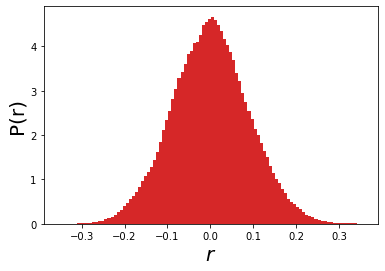

In [12]:
histogram_biased  = plt.hist(sim_biased.xlist[1000:], bins = 100, density = True, color = "tab:red")
plt.xlabel(r"$r$", fontsize = 20)
plt.ylabel(r"P(r)", fontsize = 20)

(-5.0, 60.0)

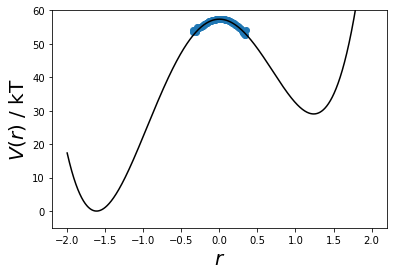

In [13]:
x_out_biased    = histogram_biased[1][:-1]
p_out_biased    = histogram_biased[0]
V_out_biased    = -np.log(p_out_biased) + umbrella(x_out_biased[50],k_bias,initial_x) - umbrella(x_out_biased,k_bias,initial_x)
V_offset_biased = potential(x_out_biased[50])  - V_out_biased[50] - min(V_in_pre) 
V_u_biased      = V_out_biased + V_offset_biased 

plt.plot(x_in,V_in,c = "black")
#plt.scatter(x_out_biased,V_out_biased,c = "tab:blue")
plt.scatter(x_out_biased,V_u_biased,c = "tab:blue")
plt.xlabel(r"$r$", fontsize = 20)
plt.ylabel(r"$V(r)$ / kT", fontsize = 20)
plt.ylim(-5,60)

Do the sampling for many windows

In [14]:
### These parameters may be changed ###
initial_x = 0.0       #initial x coordinate in the phase space
steps     = 1e6       #number of Monte Carlo steps
tolerance = 0.01      #maximum size of a Monte Carlo step
k_bias    = 100       #strength of the bias potential
n_windows = 20        #number of windows sampled
#######################################

x_bias_list = np.linspace(-1.5,1.5,n_windows)
simulations = {}

for x_bias in x_bias_list:

    bias       = umbrella(x_in, k_bias, x_bias)
    sim_biased = mc_1d(initial_x, V_in+bias)
    for _ in range(int(steps)):
        sim_biased.mcs(tolerance)
    simulations[str(x_bias)] = sim_biased

Text(0, 0.5, 'P(r)')

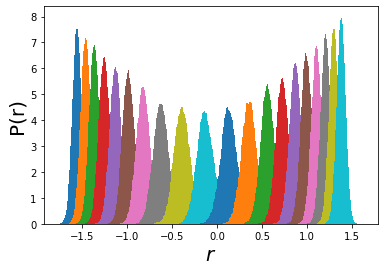

In [15]:
hist_list = {}
for bias in simulations:
    histogram_biased  = plt.hist(simulations[bias].xlist[1000:], bins = 100, density = True )
    hist_list[bias]   = histogram_biased
plt.xlabel(r"$r$", fontsize = 20)
plt.ylabel(r"P(r)", fontsize = 20)

(-5.0, 60.0)

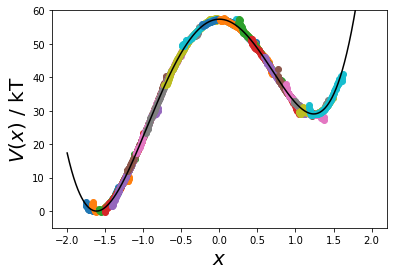

In [22]:
for bias in hist_list:
    x_out_biased    = hist_list[bias][1][:-1]
    p_out_biased    = hist_list[bias][0]
    V_out_biased    = -np.log(p_out_biased) - umbrella(x_out_biased,k_bias,float(bias))
    V_offset_biased = potential(x_out_biased[50]) - V_out_biased[50]
    V_u_biased      = V_out_biased + V_offset_biased - min(V_in_pre) 
    #plt.scatter(x_out_biased,V_out_biased)
    plt.scatter(x_out_biased,V_u_biased)
    
plt.plot(x_in,V_in,c = "black")
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel(r"$V(x)$ / kT", fontsize = 20)
plt.ylim(-5,60)